In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [46]:
data = pd.read_csv("/Users/sa20/Desktop/Data_Analyst_Job_Trends/Data/cleaned_gsearch_jobs.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58775 entries, 0 to 58774
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       58775 non-null  object 
 1   company_name                58775 non-null  object 
 2   location                    58775 non-null  object 
 3   via                         58775 non-null  object 
 4   description                 58775 non-null  object 
 5   extensions                  58775 non-null  object 
 6   job_id                      58775 non-null  object 
 7   posted_at                   58775 non-null  object 
 8   schedule_type               58775 non-null  object 
 9   work_from_home              58775 non-null  bool   
 10  date_time                   58775 non-null  object 
 11  salary_rate                 58775 non-null  object 
 12  salary_min                  58775 non-null  float64
 13  salary_max                  587

In [47]:
data.shape

(58775, 77)

In [48]:
data.head()

,title,company_name,location,via,description,extensions,job_id,posted_at,schedule_type,work_from_home,...,visa_sponsorship_flag,State,Work_type,Full-time,Part-time,Contractor,Internship,Temp work,Per diem,Volunteer
0,data analyst,Meta,Anywhere,LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,15 hours ago,Full-time,True,...,0,AR,Unknown,1,0,0,0,0,0,0
1,data analyst,ATC,United States,LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,12 hours ago,Full-time,True,...,1,AR,Unknown,1,0,0,0,0,0,0
2,aeronautical data analyst,"Garmin International, Inc.","Olathe, KS",Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,18 hours ago,Full-time,True,...,0,KS,Unknown,1,0,0,0,0,0,0
3,data analyst,Upwork,Anywhere,Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,12 hours ago,Contractor,True,...,0,AR,Remote,0,0,1,0,0,0,0
4,data analyst workforce management,Krispy Kreme,United States,LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,7 hours ago,Contractor,True,...,0,AR,Unknown,0,0,1,0,0,0,0


In [49]:
data.describe()

,salary_min,salary_max,salary_standardized,Has_experience_requirement,Has_degree_requirement,Python,R,SQL,Java,Scala,...,Pandas,NumPy,visa_sponsorship_flag,Full-time,Part-time,Contractor,Internship,Temp work,Per diem,Volunteer
count,58775.000000,58775.000000,58775.000000,58775.000000,58775.000000,58775.000000,58775.000000,58775.000000,58775.000000,58775.000000,...,58775.000000,58775.000000,58775.000000,58775.000000,58775.000000,58775.000000,58775.000000,58775.000000,58775.000000,58775.000000
mean,5349.796881,7752.809329,89393.241898,0.579617,0.914266,0.313637,0.209630,0.513109,0.028362,0.036172,...,0.016640,0.010872,0.026865,0.761157,0.039098,0.218205,0.013509,0.063667,0.000408,0.000493
std,21867.556315,31909.724331,17695.957881,0.493625,0.279973,0.463975,0.407048,0.499832,0.166007,0.186719,...,0.127918,0.103701,0.161691,0.426380,0.193830,0.413031,0.115442,0.244160,0.020203,0.022207
min,8.000000,10.000000,15080.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,75.000000,88795.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,75.000000,88795.200000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,75.000000,88795.200000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,450000.000000,850000.000000,624000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_data

title              0
Apache Spark       0
Terraform          0
Kubernetes         0
Docker             0
                  ..
Microsoft Excel    0
Excel              0
Scala              0
Java               0
Volunteer          0
Length: 77, dtype: int64

over 90 percent of data missing

In [52]:
data.nunique()

title           18834
company_name    13429
location          978
via               923
description     42717
                ...  
Contractor          2
Internship          2
Temp work           2
Per diem            2
Volunteer           2
Length: 77, dtype: int64

In [54]:
data.columns

Index(['title', 'company_name', 'location', 'via', 'description', 'extensions',
       'job_id', 'posted_at', 'schedule_type', 'work_from_home', 'date_time',
       'salary_rate', 'salary_min', 'salary_max', 'salary_standardized',
       'description_tokens', 'date', 'Has_experience_requirement',
       'Has_degree_requirement', 'Python', 'R', 'SQL', 'Java', 'Scala',
       'Excel', 'Microsoft Excel', 'Tableau', 'Power BI', 'Looker',
       'Google Sheets', 'Matplotlib', 'Seaborn', 'Apache Airflow', 'dbt',
       'Apache NiFi', 'SSIS', 'Informatica', 'Talend', 'MySQL', 'PostgreSQL',
       'Oracle', 'Redshift', 'Snowflake', 'BigQuery', 'MongoDB', 'AWS',
       'Azure', 'GCP', 'Google Cloud Platform', 'Apache Spark', 'Hadoop',
       'Kafka', 'Hive', 'Presto', 'Docker', 'Kubernetes', 'Terraform', 'Git',
       'GitHub', 'Scikit-learn', 'TensorFlow', 'Keras', 'XGBoost', 'Pandas',
       'NumPy', 'skills_found', 'has_pay_range', 'visa_sponsorship_flag',
       'State', 'Work_type', 'Full-

In [55]:
data.duplicated().sum()

0

## Univariate Analysis

In [56]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['salary_avg'].dropna(), fill=True, bw_adjust=0.5)
plt.title('Average Salaries')
plt.show()

KeyError: 'salary_avg'

<Figure size 1000x600 with 0 Axes>

### Average salaries are concentrated around the $100k range but with that being said, we have a large spike at 0 which more than likely indicates missing or unpaid entries. These unaccounted for entries contributes toward our average salaries being heavily right-skewed

In [57]:
top_25_locations = data['location'].value_counts().head(25)
top_25_locations

location
Anywhere                26381
United States           15098
Oklahoma City, OK        1424
Kansas City, MO          1392
Jefferson City, MO        911
Denver, CO                805
Bentonville, AR           591
Tulsa, OK                 503
Wichita, KS               472
Topeka, KS                434
Overland Park, KS         430
Colorado Springs, CO      414
Springfield, MO           332
Columbia, MO              309
Aurora, CO                275
Springdale, AR            220
Englewood, CO             214
Kansas City, KS           208
California, MO            186
Rogers, AR                183
Missouri                  171
Fayetteville, AR          165
Lenexa, KS                156
Boulder, CO               145
Edmond, OK                139
Name: count, dtype: int64

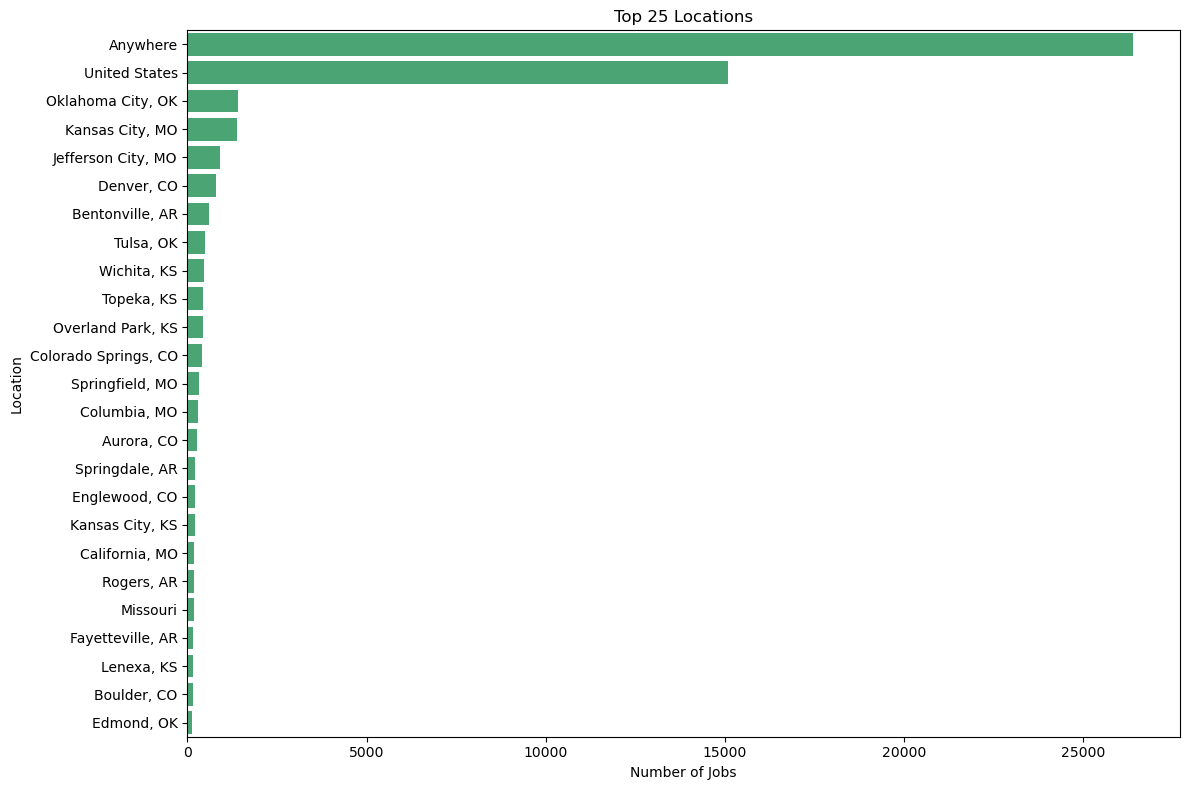

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_25_locations.index, x=top_25_locations.values, color='mediumseagreen')
plt.title('Top 25 Locations')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

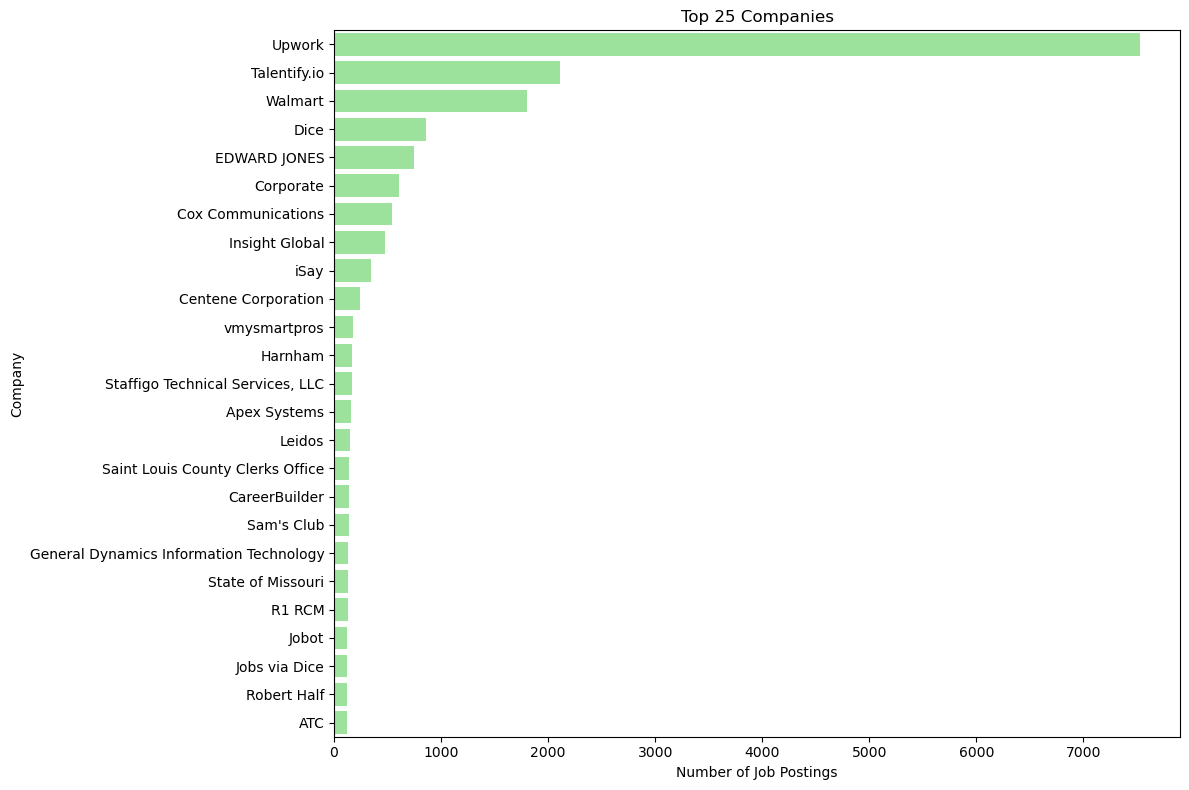

In [59]:
top_25_companies = data['company_name'].value_counts().head(25)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_25_companies.index, x=top_25_companies.values, color='lightgreen')
plt.title('Top 25 Companies')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


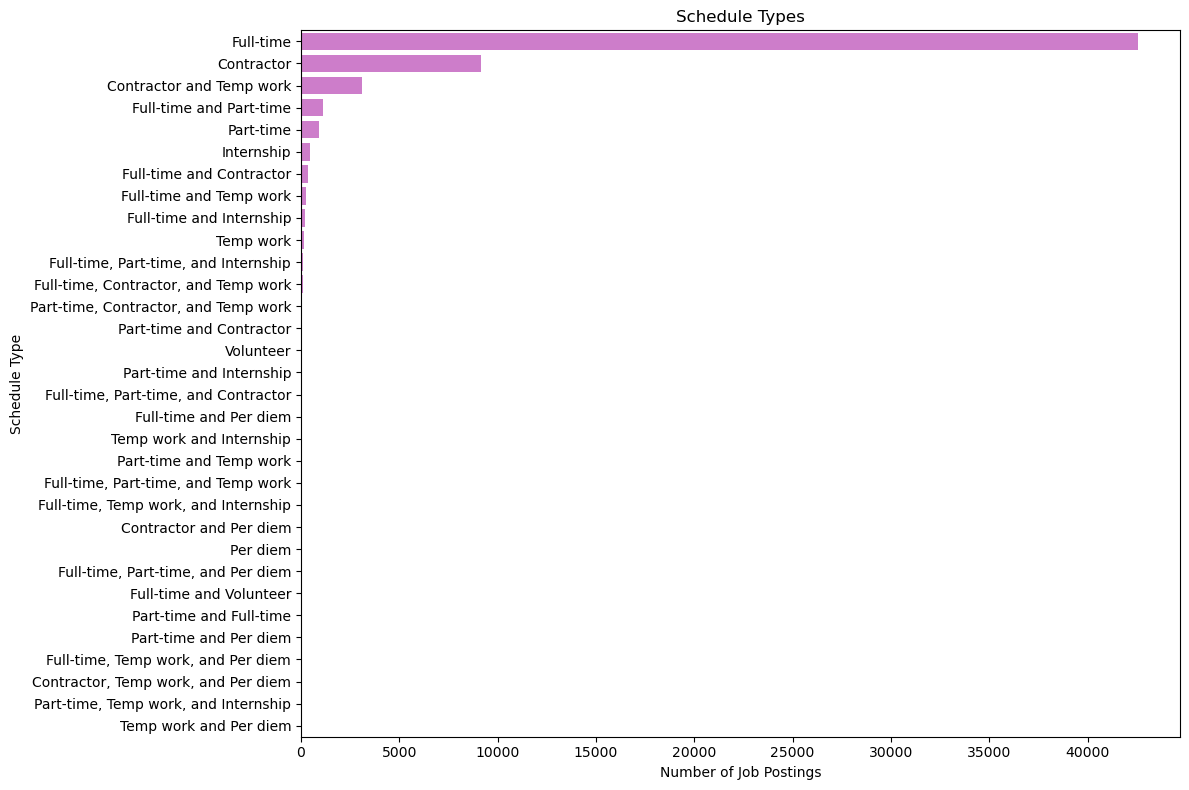

In [60]:
schedule_counts = data['schedule_type'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=schedule_counts.index, x=schedule_counts.values, color='orchid')
plt.title('Schedule Types')
plt.xlabel('Number of Job Postings')
plt.ylabel('Schedule Type')
plt.tight_layout()
plt.show()

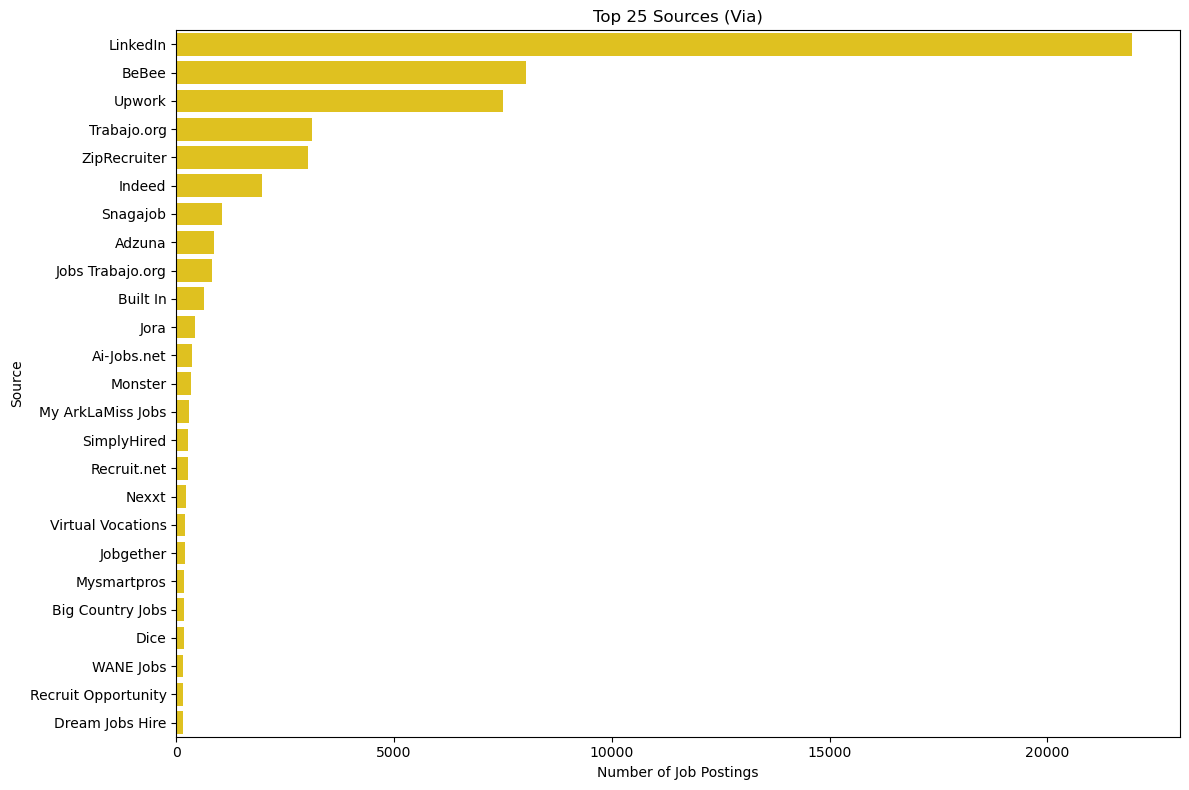

In [61]:
top_25_via = data['via'].value_counts().head(25)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_25_via.index, x=top_25_via.values, color='gold')
plt.title('Top 25 Sources (Via)')
plt.xlabel('Number of Job Postings')
plt.ylabel('Source')
plt.tight_layout()
plt.show()

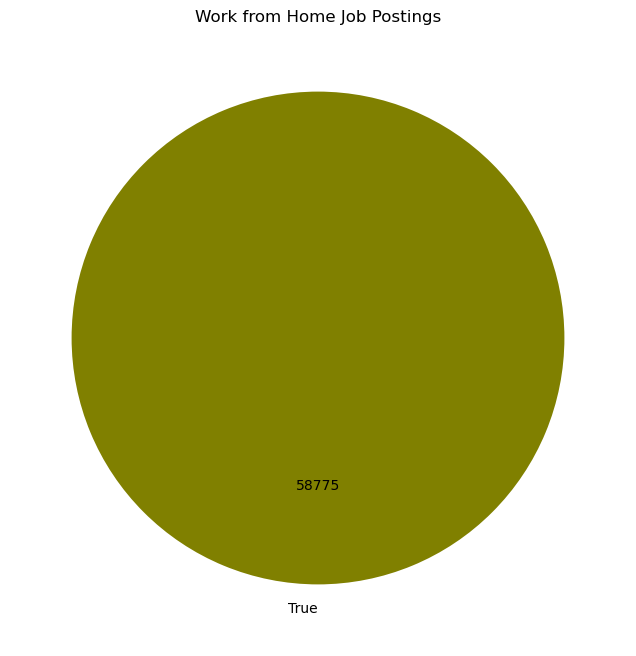

In [62]:
wfh_counts = data['work_from_home'].value_counts()
colors = ["olive","skyblue"]

plt.figure(figsize=(8, 8))
plt.pie(
    wfh_counts, 
    labels=wfh_counts.index, 
    autopct=lambda pct: f"{int(pct * sum(wfh_counts) / 100)}",
    colors=colors, 
    startangle=90
    )
plt.title('Work from Home Job Postings')
plt.show()

In [63]:
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='search_term', color='salmon', order=data['search_term'].value_counts().index)
plt.title('Search Term Frequency')
plt.xlabel('Search Term')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()

KeyError: 'search_term'

<Figure size 1400x600 with 0 Axes>

# Bivariate Analysis

In [64]:
top_10 = data['schedule_type'].value_counts().head(10).index

plt.figure(figsize=(10, 6))

sns.boxplot(data=data[data['schedule_type'].isin(top_10)], x='schedule_type', y='salary_avg', palette='Set2')
plt.title('Salary Distribution by Schedule Type')
plt.xlabel('Schedule Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `salary_avg` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

### Full-time jobs have the highest average salary and also the widest range, while internships and part-time roles offer the lowest pay. Contractor roles fall in between full-time and part-time in average salary but also show a diverse range.

### Temporary and combined roles generally have moderate salaries. There are some notable outliers in full-time and contractor categories which indicate some postings offer significantly more than the average salary

## Multivariate Analysis

In [21]:
sal_cols = ['salary_avg', 'salary_min', 'salary_max', 'salary_standardized']

In [65]:
corr = data[sal_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Salary-related Columns')
plt.tight_layout()
plt.show()

KeyError: "['salary_avg'] not in index"

## Location Transformations

In [66]:
data['description'] = data['description'].fillna('').astype(str)

In [67]:
valid_states = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY',
    'DC'
}

In [69]:
def city_state(text):
    text_lower = text.lower()
    ar_keywords = [
        "ar/vr", "augmented reality", "virtual reality", "mixed reality", "xr",
        "spatial computing", "vr headset", "ar headset", "meta quest", "oculus"
    ]
    is_ar_text = any(term in text_lower for term in ar_keywords)

    matches = re.findall(r'\b([A-Za-z\s]+?),\s*([A-Z]{2})\b', text)

    excl_non_city_keywords = {
        "are", "we", "you", "the", "they", "join", "as", "with", "and", "be", "or", "to", "in", "for"
    }

    results = []
    for city, state in matches:
        city_clean = city.strip().lower()
        if state not in valid_states:
            continue
        if city_clean in excl_non_city_keywords:
            continue
        if state == "AR" and is_ar_text:
            continue  
        results.append((city.title(), state))
    return results

In [70]:
data['location_data'] = data['description'].apply(city_state)

In [71]:
data['location_city'] = data['location_data'].apply(lambda x: x[0][0] if x else None)
data['location_state'] = data['location_data'].apply(lambda x: x[0][1] if x else None)

In [72]:
location_keywords = {
    "bay area": "CA",
    "silicon valley": "CA",
    "new york city": "NY",
    "manhattan": "NY",
    "new york": "NY",
    "nyc": "NY",
    "tri-state": "NY",
    "los angeles": "CA",
    "seattle area": "WA",
    "greater seattle": "WA",
    "dfw": "TX",
    "chicago area": "IL",
    "atlanta metro": "GA",
    "boston area": "MA",
    "san francisco": "CA",
    "washington dc": "DC",
    "austin": "TX", 
    "houston": "TX", 
    "dallas": "TX", 
    "san antonio": "TX",
    "denver": "CO", 
    "boulder": "CO", 
    "miami": "FL", 
    "orlando": "FL",
    "phoenix": "AZ", 
    "scottsdale": "AZ", 
    "pittsburgh": "PA",
    "san diego": "CA", 
    "oakland": "CA", 
    "sacramento": "CA",
    "raleigh": "NC", 
    "charlotte": "NC", 
    "nashville": "TN",
    "columbus": "OH", 
    "minneapolis": "MN", 
    "st. paul": "MN",
    "detroit": "MI", 
    "indianapolis": "IN"
}

In [73]:
def find_region_keywords(text):
    text = text.lower()
    for keyword, state in location_keywords.items():
        if keyword in text:
            return keyword, state
        return None, None

data[['region_keyword', 'region_state']] = data['description'].apply(lambda x: pd.Series(find_region_keywords(x)))

In [74]:
def choose_state(row):
    return row['location_state'] if pd.notnull(row['location_state']) else row['region_state']

data['state_result'] = data.apply(choose_state, axis=1)

In [75]:
job_counts = data['state_result'].value_counts().sort_values(ascending=False)

/var/folders/3f/6n41dbh50j169t78h6tncq1m0000gn/T/ipykernel_25256/2042991619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_states.values, y=top_25_states.index, palette='viridis')


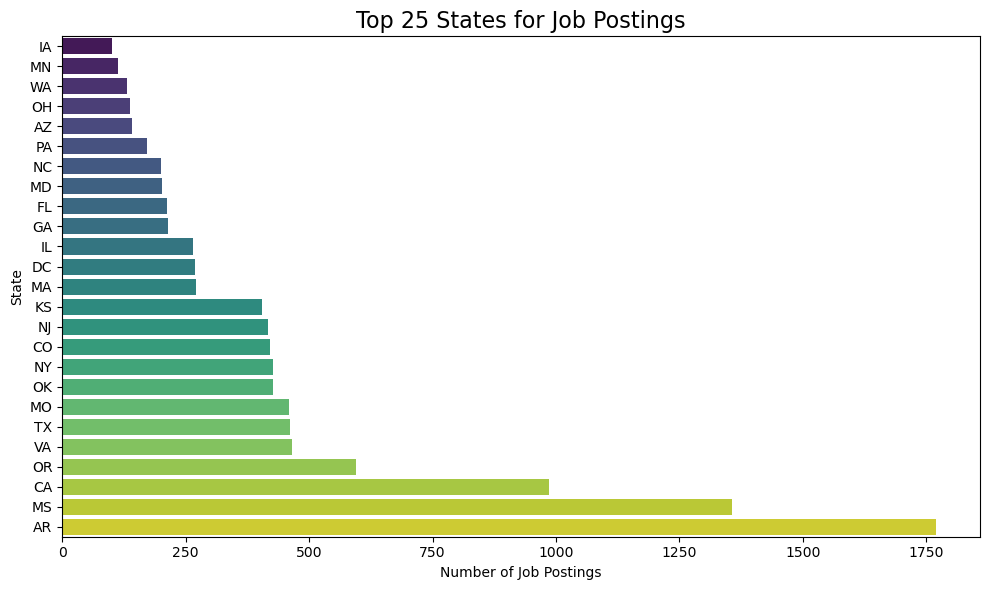

In [109]:
top_25_states = job_counts.head(25).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_25_states.values, y=top_25_states.index, palette='viridis')
plt.title('Top 25 States for Job Postings', fontsize=16)
plt.xlabel('Number of Job Postings')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [77]:
print(data['state_result'].value_counts())

state_result
AR    1770
MS    1357
CA     985
OR     595
VA     465
TX     462
MO     460
OK     427
NY     427
CO     420
NJ     417
KS     405
MA     272
DC     268
IL     264
GA     214
FL     212
MD     203
NC     200
PA     171
AZ     141
OH     138
WA     132
MN     114
IA     100
TN      92
WI      90
MI      87
CT      66
UT      53
IN      45
ID      35
LA      32
AL      31
DE      31
NM      27
RI      25
SC      22
SD      19
KY      18
NE      15
AK      14
HI      13
WV      10
WY       9
NV       7
ND       6
NH       6
ME       5
MT       3
VT       3
Name: count, dtype: int64


In [78]:
data['location_found'] = data['state_result'].apply(lambda x: 'Found' if pd.notnull(x) else 'Unknown')

In [79]:
print(data['location_found'].value_counts().to_string())

location_found
Unknown    47392
Found      11383


In [80]:
def classify_us_locations(row):
    if pd.notnull(row['state_result']):
        return row['state_result']
    elif row['location_found'] == 'Unknown':
        return 'US'
    else:
        return None

data['final_location'] = data.apply(classify_us_locations, axis= 1)

In [81]:
print(data['final_location'].value_counts().to_string())

final_location
US    47392
AR     1770
MS     1357
CA      985
OR      595
VA      465
TX      462
MO      460
NY      427
OK      427
CO      420
NJ      417
KS      405
MA      272
DC      268
IL      264
GA      214
FL      212
MD      203
NC      200
PA      171
AZ      141
OH      138
WA      132
MN      114
IA      100
TN       92
WI       90
MI       87
CT       66
UT       53
IN       45
ID       35
LA       32
AL       31
DE       31
NM       27
RI       25
SC       22
SD       19
KY       18
NE       15
AK       14
HI       13
WV       10
WY        9
NV        7
ND        6
NH        6
ME        5
MT        3
VT        3


/var/folders/3f/6n41dbh50j169t78h6tncq1m0000gn/T/ipykernel_25256/3888243228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')


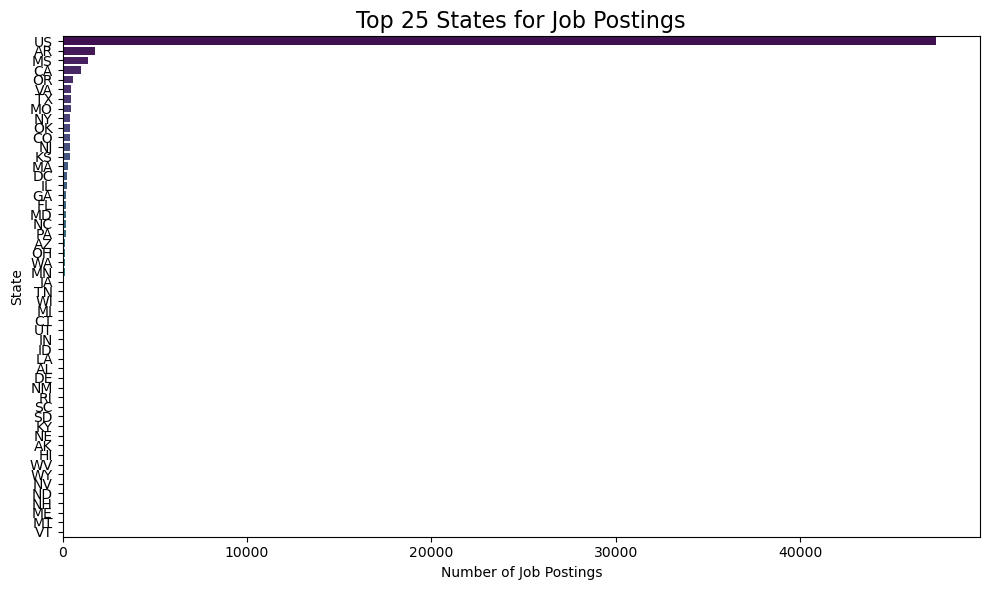

In [82]:
location_counts = data['final_location'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title('Top 25 States for Job Postings', fontsize=16)
plt.xlabel('Number of Job Postings')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [83]:
len(data[(data['state_result'] == 'AR') & (data["company_name"] == "Walmart")])

1408

In [84]:
print(data[data['location_found'] == "Unknown"]['location'].value_counts())

location
Anywhere              23768
United States         11493
Kansas City, MO        1170
Oklahoma City, OK      1086
Denver, CO              705
                      ...  
Park City, KS             1
Sperry, OK                1
Westwood Hills, KS        1
Vilonia, AR               1
Eudora, MO                1
Name: count, Length: 891, dtype: int64


In [85]:
data.columns

Index(['title', 'company_name', 'location', 'via', 'description', 'extensions',
       'job_id', 'posted_at', 'schedule_type', 'work_from_home', 'date_time',
       'salary_rate', 'salary_min', 'salary_max', 'salary_standardized',
       'description_tokens', 'date', 'Has_experience_requirement',
       'Has_degree_requirement', 'Python', 'R', 'SQL', 'Java', 'Scala',
       'Excel', 'Microsoft Excel', 'Tableau', 'Power BI', 'Looker',
       'Google Sheets', 'Matplotlib', 'Seaborn', 'Apache Airflow', 'dbt',
       'Apache NiFi', 'SSIS', 'Informatica', 'Talend', 'MySQL', 'PostgreSQL',
       'Oracle', 'Redshift', 'Snowflake', 'BigQuery', 'MongoDB', 'AWS',
       'Azure', 'GCP', 'Google Cloud Platform', 'Apache Spark', 'Hadoop',
       'Kafka', 'Hive', 'Presto', 'Docker', 'Kubernetes', 'Terraform', 'Git',
       'GitHub', 'Scikit-learn', 'TensorFlow', 'Keras', 'XGBoost', 'Pandas',
       'NumPy', 'skills_found', 'has_pay_range', 'visa_sponsorship_flag',
       'State', 'Work_type', 'Full-

In [94]:
print(len(data))

58775


In [103]:
data['location'] = data['location'].fillna('').astype(str)

data['loc_data'] = data['location'].apply(city_state)
data['loc_city'] = data['loc_data'].apply(lambda x: x[0][0] if x else None)
data['loc_state'] = data['loc_data'].apply(lambda x: x[0][1] if x else None)

In [104]:
data['state_result'] = data['state_result'].fillna(data['loc_state'])

In [105]:
data['location_found'] = data['state_result'].apply(lambda x: 'Found' if pd.notnull(x) else 'Unknown')

data['final_location'] = data.apply(classify_us_locations, axis=1)

In [106]:
print(data['location_found'].value_counts())

location_found
Unknown    35612
Found      23163
Name: count, dtype: int64


In [107]:
# Checking to see how drastically Job postings changed with new updates to code
print("Total job postings:", len(data))
print("Postings with state before location extraction:", (data['location_state'].notnull()).sum())
print("Postings with state after location + description extraction:", data['state_result'].notnull().sum())

Total job postings: 58775
Postings with state before location extraction: 11187
Postings with state after location + description extraction: 23163


In [108]:
print(data['state_result'].value_counts())

state_result
MO    4213
CO    2973
OK    2686
AR    2535
KS    2346
MS    1357
CA    1077
OR     595
TX     518
VA     470
NY     445
NJ     422
MA     293
DC     271
IL     264
GA     214
FL     212
NM     212
MD     205
NC     200
PA     176
AZ     146
OH     138
WA     132
MN     115
IA     100
TN      92
WI      90
MI      87
WY      82
CT      67
UT      61
IN      45
NE      41
ID      36
LA      32
DE      31
AL      31
RI      25
SC      22
SD      19
KY      18
AK      14
HI      13
WV      11
NH       7
NV       7
ND       6
ME       5
MT       3
VT       3
Name: count, dtype: int64


## It worked!!! :)

/var/folders/3f/6n41dbh50j169t78h6tncq1m0000gn/T/ipykernel_25256/2889397064.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_states.values, y=top_25_states.index, palette='viridis')


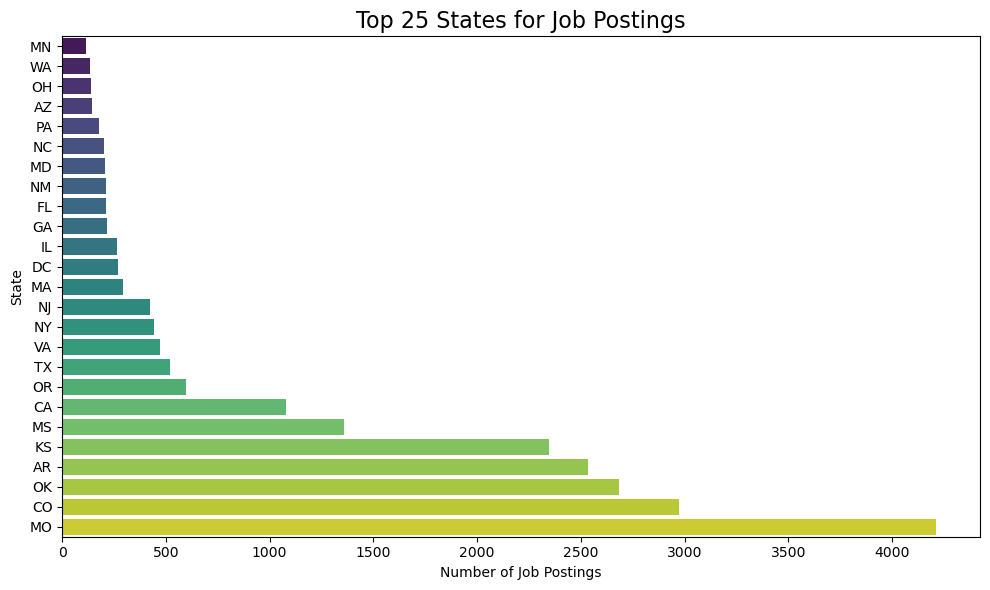

In [112]:
state_counts = data['state_result'].value_counts().sort_values(ascending=False)

top_25_states = state_counts.head(25).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_25_states.values, y=top_25_states.index, palette='viridis')
plt.title('Top 25 States for Job Postings', fontsize=16)
plt.xlabel('Number of Job Postings')
plt.ylabel('State')
plt.tight_layout()
plt.show()